In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Yash\Desktop\ExcelR Project\P357\Data Set\bankruptcy-prevention (2).csv")

In [3]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
df.isna().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [6]:
df.shape

(250, 7)

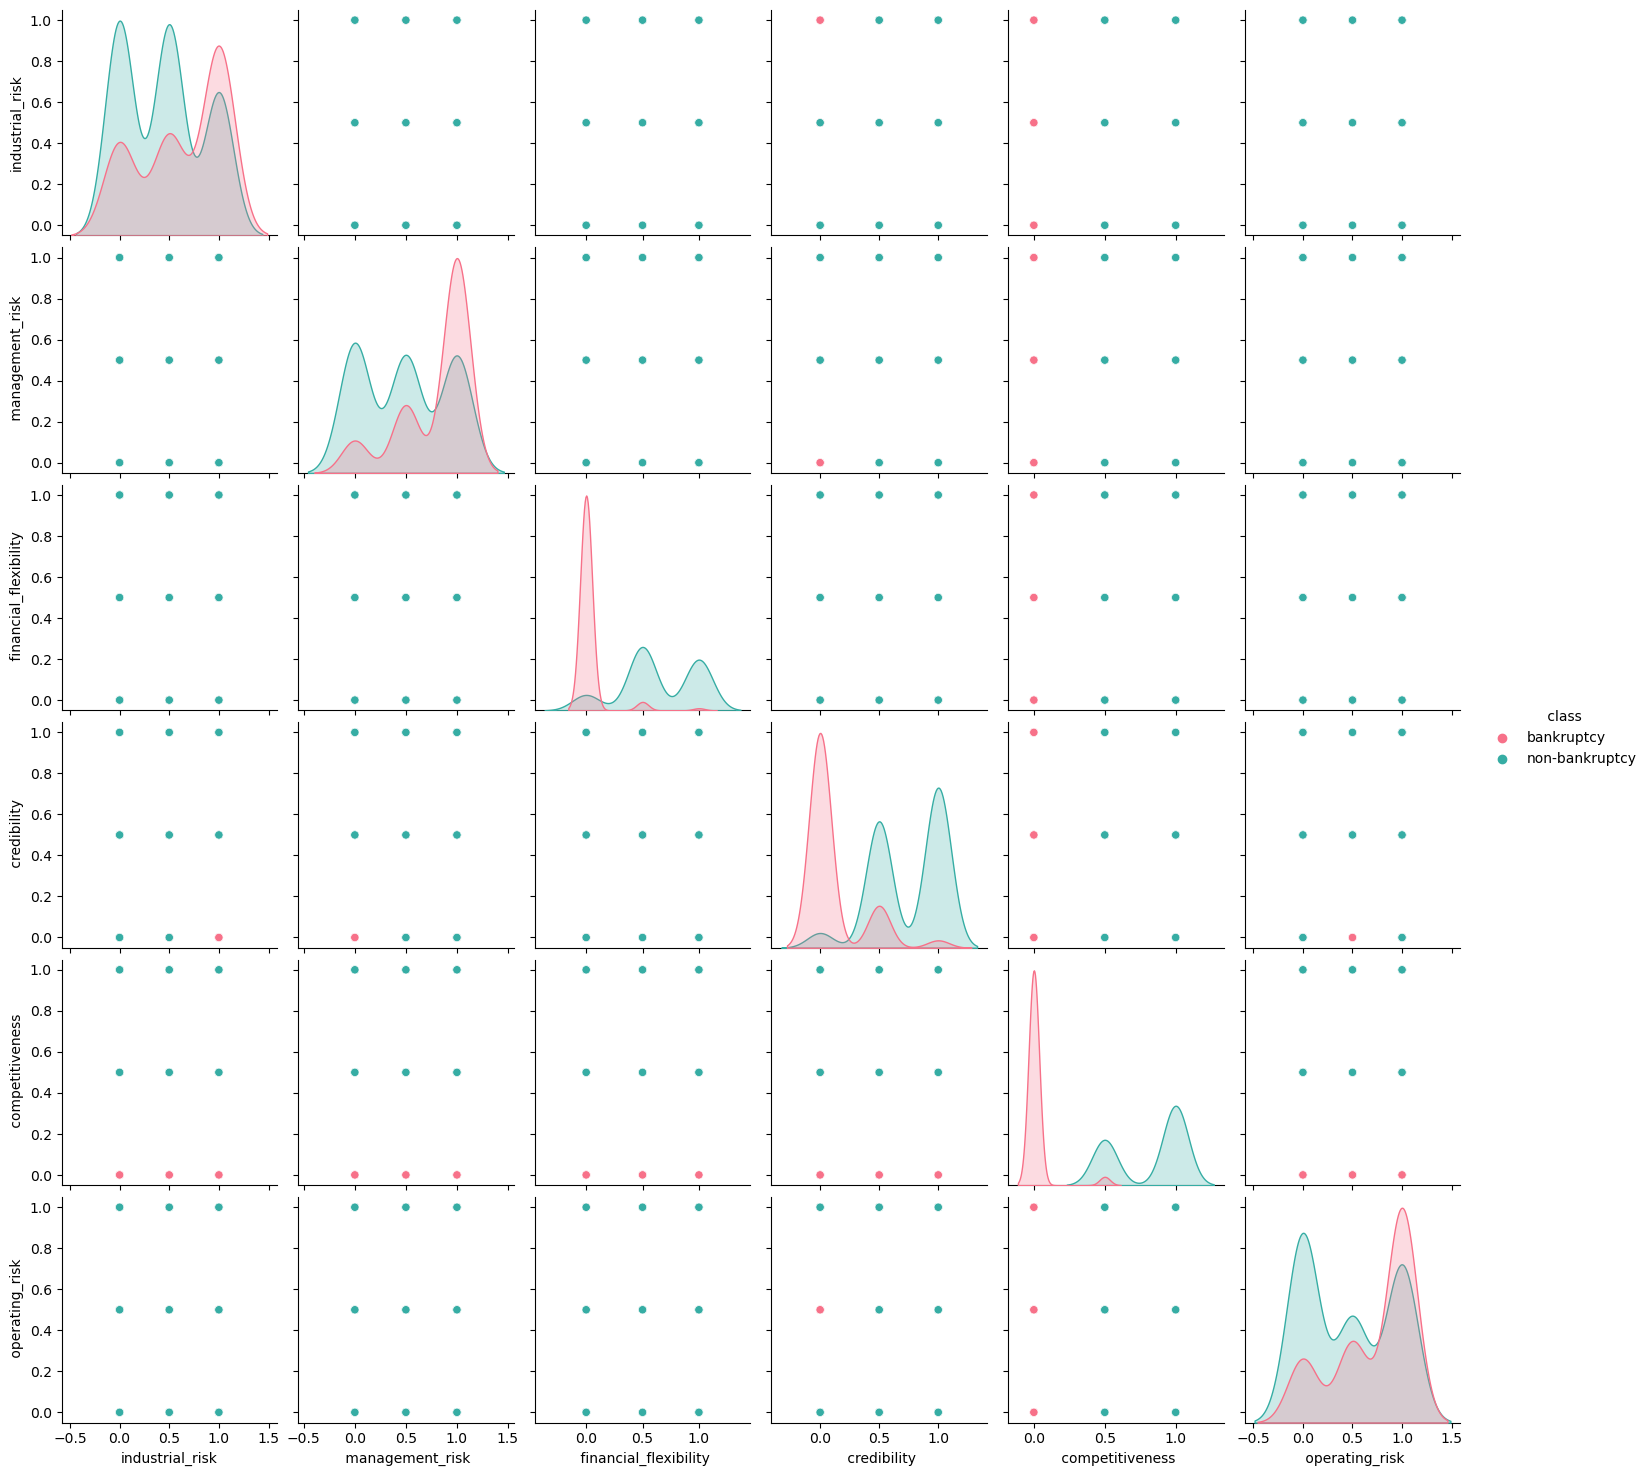

In [7]:
sns.pairplot(df, hue=' class', palette='husl')
plt.show()

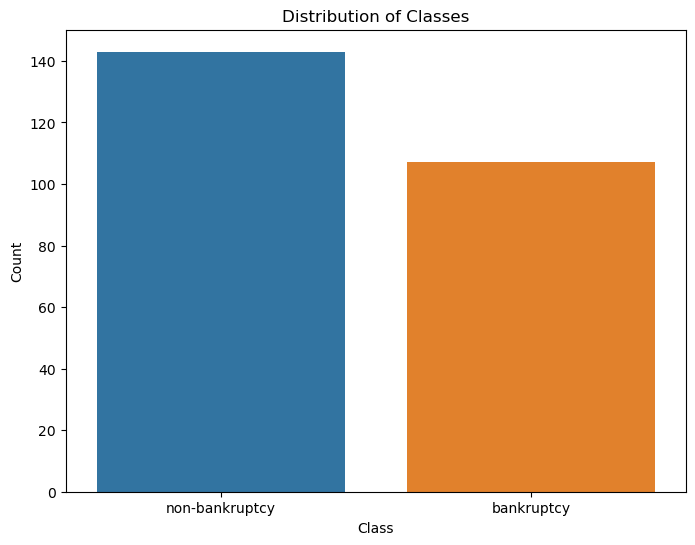

In [8]:
class_counts = df[' class'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

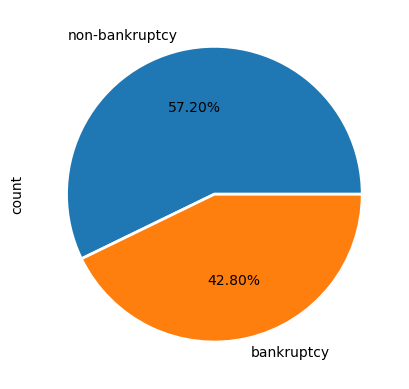

In [9]:
df[" class"].value_counts().plot(kind="pie",autopct="%1.2f%%",wedgeprops={"linewidth": 2, "edgecolor": "white"});

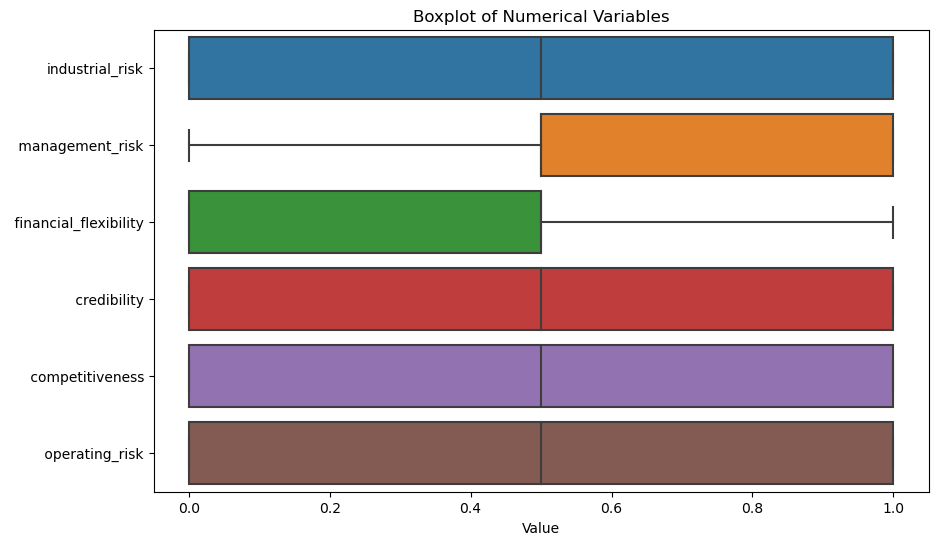

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=' class'), orient='h')
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Value')
plt.show()

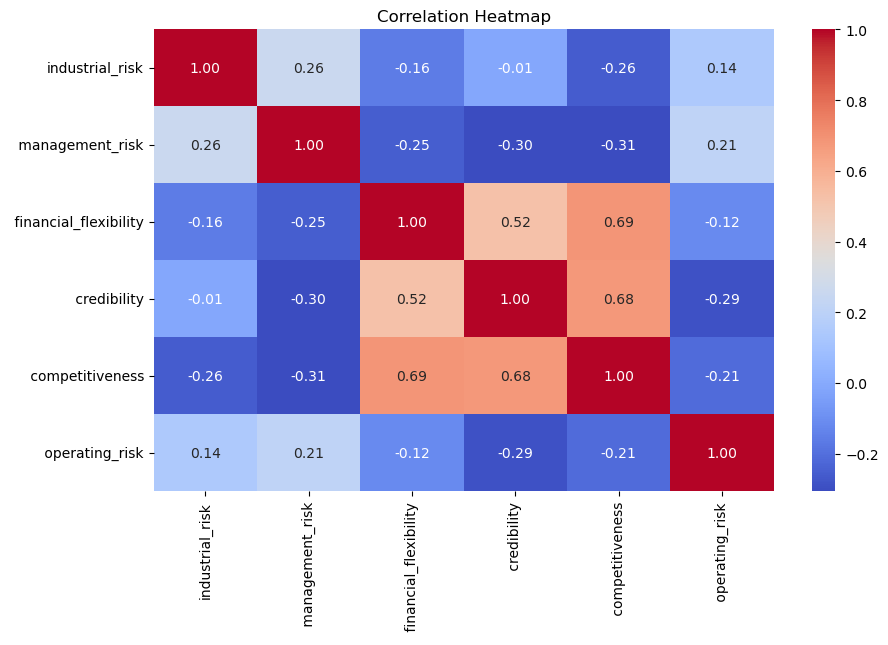

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=' class').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df = df.replace('bankruptcy',1).replace('non-bankruptcy',0)

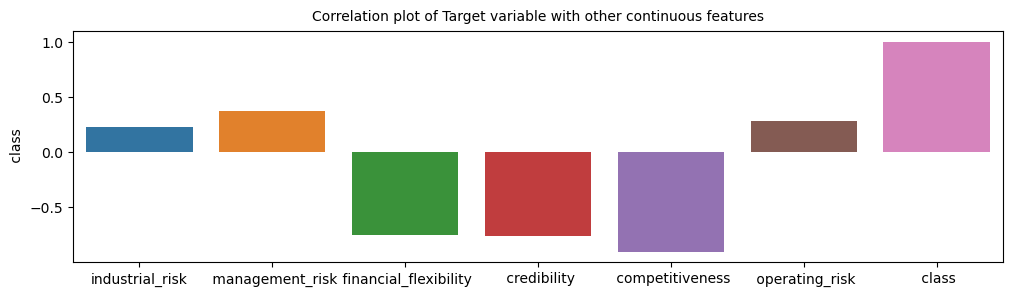

In [13]:
corr = df.corr()
fig , ax = plt.subplots(figsize=(12,3))
sns.barplot(x = corr.index, y = corr.iloc[:,-1])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=10, y =1.01)
plt.show()

In [14]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


In [15]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0
249,1.0,0.0,0.5,0.5,1.0,1.0,0


# Logistic Regression

In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 420)

In [18]:
X_train

array([[0.5, 0. , 0. , 1. , 0.5, 0. ],
       [0. , 0. , 0.5, 0.5, 0.5, 0. ],
       [1. , 0.5, 0. , 0. , 0. , 1. ],
       ...,
       [0. , 1. , 0.5, 0.5, 0.5, 1. ],
       [1. , 0.5, 1. , 0.5, 0. , 0. ],
       [0. , 0.5, 0.5, 1. , 1. , 1. ]])

In [19]:
X_test

array([[0.5, 0. , 0. , 0.5, 0. , 1. ],
       [0. , 0.5, 0.5, 0.5, 1. , 0.5],
       [0. , 0. , 1. , 1. , 1. , 0. ],
       [0. , 0. , 0.5, 0.5, 1. , 1. ],
       [0. , 0.5, 1. , 0. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. , 0.5],
       [0.5, 0.5, 0. , 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. , 0. , 1. ],
       [1. , 1. , 0. , 0. , 0. , 1. ],
       [0.5, 1. , 0. , 0. , 0. , 1. ],
       [1. , 1. , 0. , 0. , 0. , 0.5],
       [1. , 1. , 0. , 1. , 0. , 1. ],
       [1. , 0. , 0. , 1. , 1. , 0.5],
       [1. , 1. , 1. , 1. , 0.5, 1. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5],
       [0. , 0.5, 1. , 0.5, 1. , 0. ],
       [0.5, 0.5, 1. , 1. , 1. , 0.5],
       [0.5, 0. , 0.5, 1. , 0.5, 0. ],
       [0.5, 0.5, 1. , 1. , 0.5, 0.5],
       [0. , 0.5, 0. , 0. , 0. , 0.5],
       [1. , 1. , 0. , 0. , 0. , 0. ],
       [0.5, 1. , 0.5, 0.5, 1. , 1. ],
       [0.5, 0.5, 0.5, 0.5, 1. , 1. ],
       [0.5, 1. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 1. , 0.5, 0.5, 0. ],
       [0.5, 0.5, 1. , 0.

In [20]:
y_train

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0], dtype=int64)

In [21]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0], dtype=int64)

In [22]:
lr = LogisticRegression(random_state = 420)

In [23]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=420)

In [24]:
y_pred = lr.predict(X_test)

In [25]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[31,  0],
       [ 0, 19]], dtype=int64)

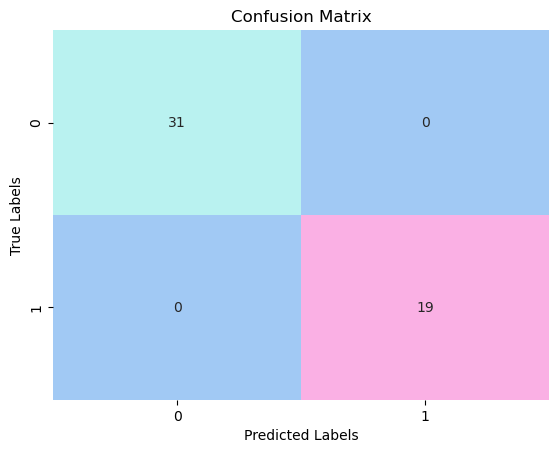

In [26]:
cmap = sns.color_palette("pastel") 
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy of Logistic Regression model is: ',accuracy*100,'%')

The accuracy of Logistic Regression model is:  100.0 %


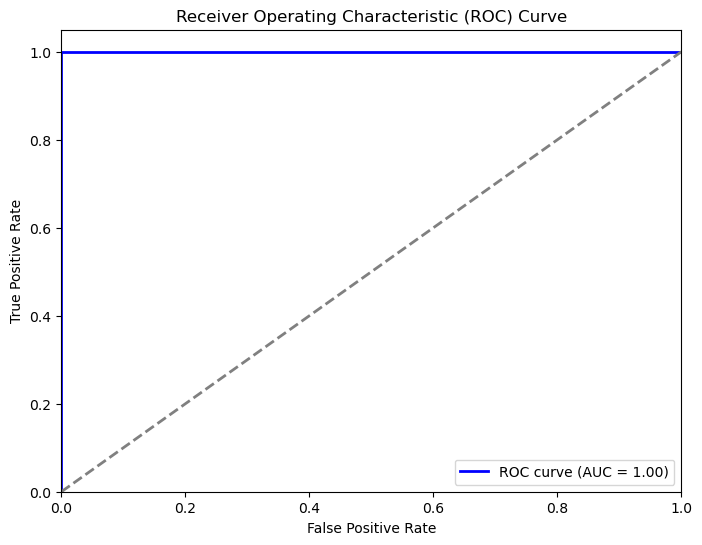

In [28]:
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
print("Precision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))

print("F1 Score:", f1_score(y_test, y_pred))

print("AUC:", roc_auc_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred_KNN = KNN.predict(X_test)

In [32]:
cm = confusion_matrix(y_test,y_pred_KNN)
cm

array([[31,  0],
       [ 0, 19]], dtype=int64)

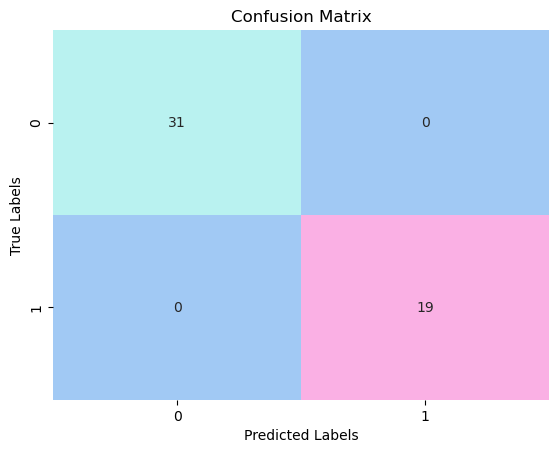

In [33]:
cmap = sns.color_palette("pastel") 
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print('Accuracy of KNN model is: ',accuracy_score(y_test,y_pred_KNN)*100,'%')

Accuracy of KNN model is:  100.0 %


In [35]:
print("Precision:", precision_score(y_test, y_pred_KNN))
 
print("Recall:", recall_score(y_test, y_pred_KNN))

print("F1 Score:", f1_score(y_test, y_pred_KNN))

print("AUC:", roc_auc_score(y_test, y_pred_KNN))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


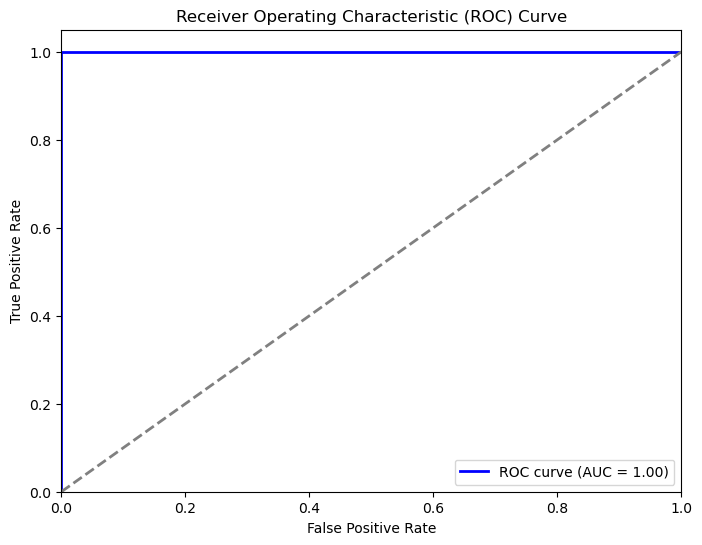

In [36]:
probs = KNN.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# SVM

In [37]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [38]:
y_pred_SVM = SVM.predict(X_test)

In [39]:
cm = confusion_matrix(y_test,y_pred_SVM)
cm

array([[31,  0],
       [ 0, 19]], dtype=int64)

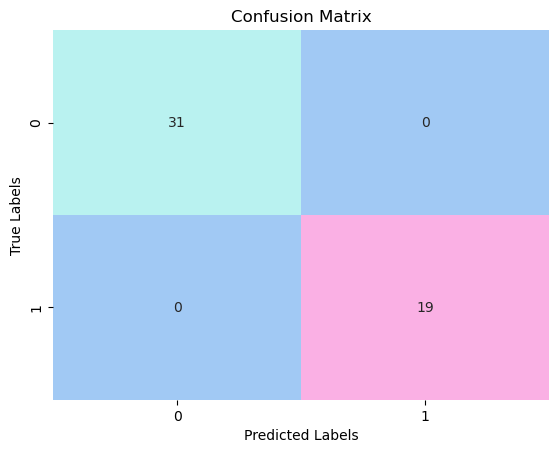

In [40]:
cmap = sns.color_palette("pastel") 
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print('Accuracy of  SVM model is: ',accuracy_score(y_test,y_pred_SVM)*100,'%')

Accuracy of  SVM model is:  100.0 %


In [42]:
print("Precision:", precision_score(y_test, y_pred_SVM))

print("Recall:", recall_score(y_test, y_pred_SVM))

print("F1 Score:", f1_score(y_test, y_pred_SVM))

print("AUC:", roc_auc_score(y_test, y_pred_SVM))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion = 'entropy')
Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
y_pred_Tree = Tree.predict(X_test)

In [45]:
cm = confusion_matrix(y_test,y_pred_Tree)
cm

array([[31,  0],
       [ 0, 19]], dtype=int64)

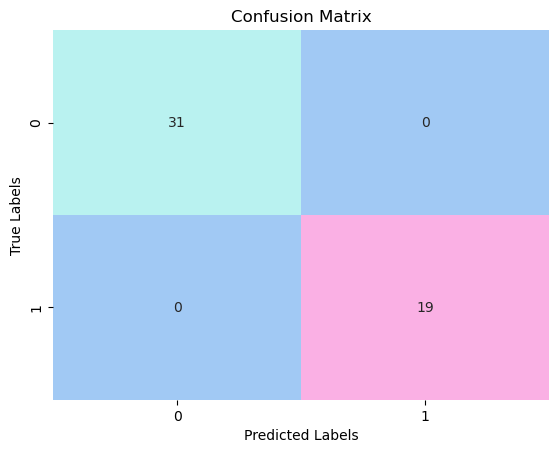

In [46]:
cmap = sns.color_palette("pastel") 
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
print('Accuracy of  Decision Tree model is: ',accuracy_score(y_test,y_pred_Tree)*100,'%')

Accuracy of  Decision Tree model is:  100.0 %


In [48]:
print("Precision:", precision_score(y_test, y_pred_Tree))

print("Recall:", recall_score(y_test, y_pred_Tree))

print("F1 Score:", f1_score(y_test, y_pred_Tree))

print("AUC:", roc_auc_score(y_test, y_pred_Tree))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


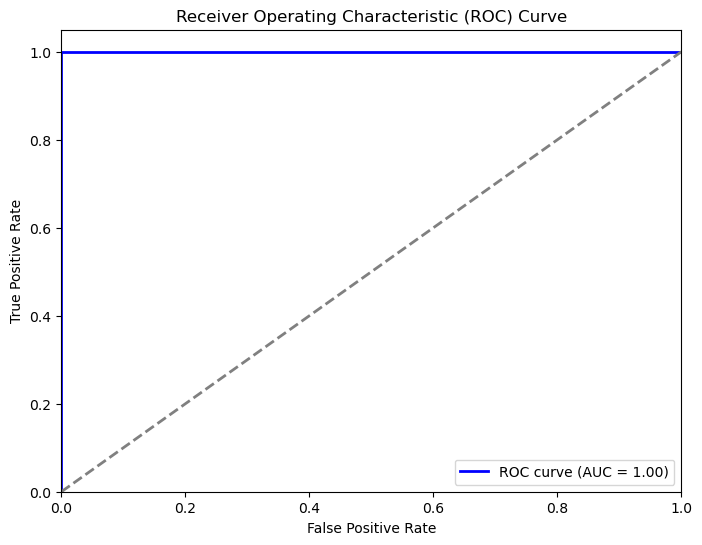

In [49]:
probs = Tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [51]:
y_pred_RFC = Tree.predict(X_test)

In [52]:
cm = confusion_matrix(y_test,y_pred_RFC)
cm

array([[31,  0],
       [ 0, 19]], dtype=int64)

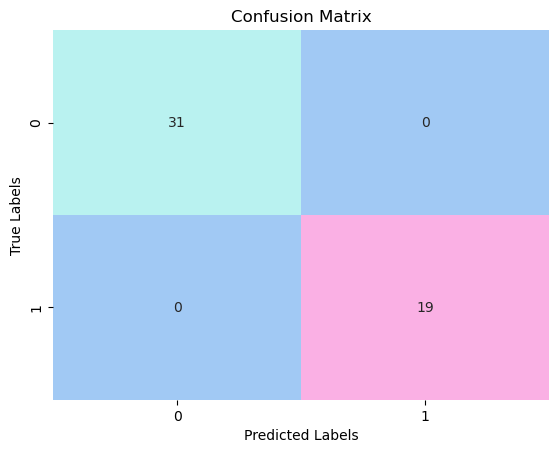

In [53]:
cmap = sns.color_palette("pastel") 
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
print('Accuracy of  Random Forest model is: ',accuracy_score(y_test,y_pred_RFC)*100,'%')

Accuracy of  Random Forest model is:  100.0 %


In [55]:
print("Precision:", precision_score(y_test, y_pred_RFC))

print("Recall:", recall_score(y_test, y_pred_RFC))

print("F1 Score:", f1_score(y_test, y_pred_RFC))

print("AUC:", roc_auc_score(y_test, y_pred_RFC))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


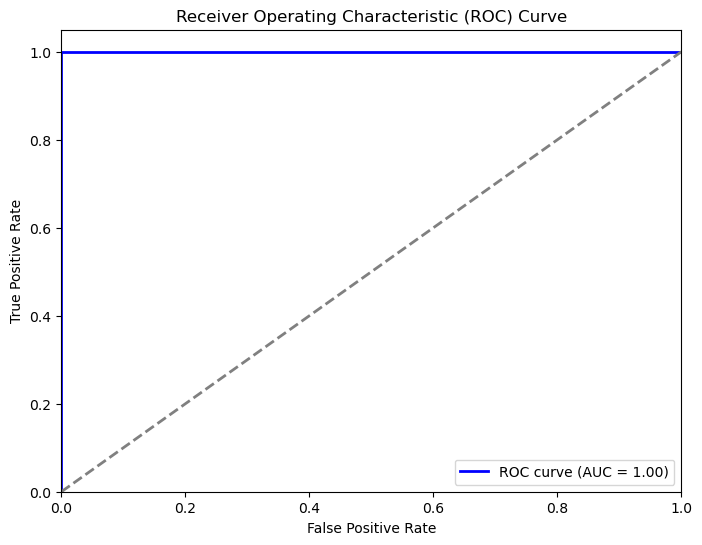

In [56]:
probs = Tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()

In [58]:
naive.fit(X_train,y_train)

GaussianNB()

In [59]:
y_pred_naive = naive.predict(X_test)
cm = confusion_matrix(y_test,y_pred_naive)
cm

array([[31,  0],
       [ 1, 18]], dtype=int64)

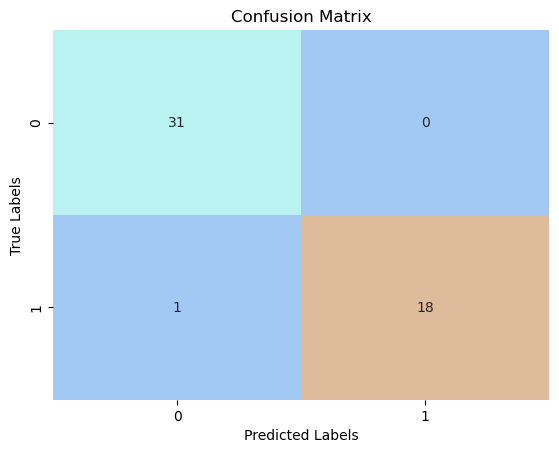

In [60]:
cmap = sns.color_palette("pastel") 
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print('Accuracy of the Naive Bayes model is: ',accuracy_score(y_test,y_pred_naive)*100,'%')

Accuracy of the Naive Bayes model is:  98.0 %


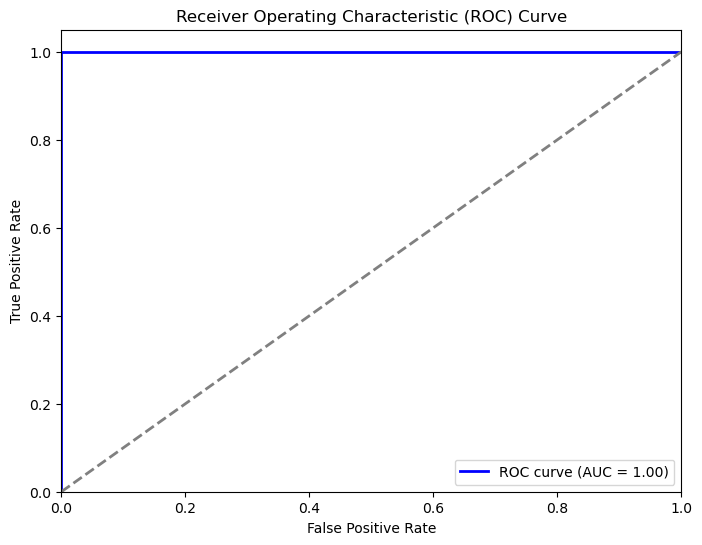

In [62]:
probs = naive.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
print("Precision:", precision_score(y_test, y_pred_naive))

print("Recall:", recall_score(y_test, y_pred_naive))

print("F1 Score:", f1_score(y_test, y_pred_naive))

print("AUC:", roc_auc_score(y_test, y_pred_naive))

Precision: 1.0
Recall: 0.9473684210526315
F1 Score: 0.972972972972973
AUC: 0.9736842105263157


# Saving The Model

In [64]:
# import pickle
# filename = 'model.sav'
# pickle.dump(lr,open(filename,'wb'))